# Temperature and flow solutions

In [158]:
%load_ext autoreload
%autoreload 2
%run ct_data.py '../crunchtope_model/results.nc' -c pH totcon
%run pf_data.py '../pflotran_model/little_dev_model/flow_steady_state/steady_flow.h5'
%run figures.py
import cmcrameri.cm as cm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Error: The following variables are not in the xarray object: ['Forsterite_VF', 'Fayalite_VF']. Mineral not found.


In [159]:
pf_data

<xarray.Dataset> Size: 4MB
Dimensions:            (time: 41, x: 32, y: 1, z: 32)
Coordinates:
  * time               (time) float64 328B 0.0 500.0 1e+03 ... 1.95e+04 2e+04
  * x                  (x) float64 256B 23.44 70.31 117.2 ... 1.43e+03 1.477e+03
  * y                  (y) float64 8B 50.0
  * z                  (z) float64 256B 23.44 70.31 117.2 ... 1.43e+03 1.477e+03
Data variables:
    Liquid X-Velocity  (time, x, y, z) float64 336kB 0.0 0.0 ... -0.0002561
    Liquid Y-Velocity  (time, x, y, z) float64 336kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Liquid Z-Velocity  (time, x, y, z) float64 336kB 0.0 0.0 ... -0.07982
    Liquid_Density     (time, x, y, z) float64 336kB 930.3 930.1 ... 1.049e+03
    Liquid_Pressure    (time, x, y, z) float64 336kB 1.134e+08 ... 1.002e+08
    Liquid_Saturation  (time, x, y, z) float64 336kB 1.0 1.0 1.0 ... 1.0 1.0 1.0
    Liquid_Viscosity   (time, x, y, z) float64 336kB 9.303e-05 ... 0.001592
    Material_ID        (time, x, y, z) int32 168kB 1 1 1 1 1 1 1 ... 2 2 2 2 2 2
    Mineral_Porosity   (time, x, y, z) float64 336kB 0.01 0.01 ... 0.01 0.01
    Permeability       (time, x, y, z) float64 336kB 2e-15 2e-15 ... 2e-13 2e-13
    Temperature        (time, x, y, z) float64 336kB 400.0 400.0 ... 2.153 2.042

Text(0, 0.5, 'Z Coordinate')

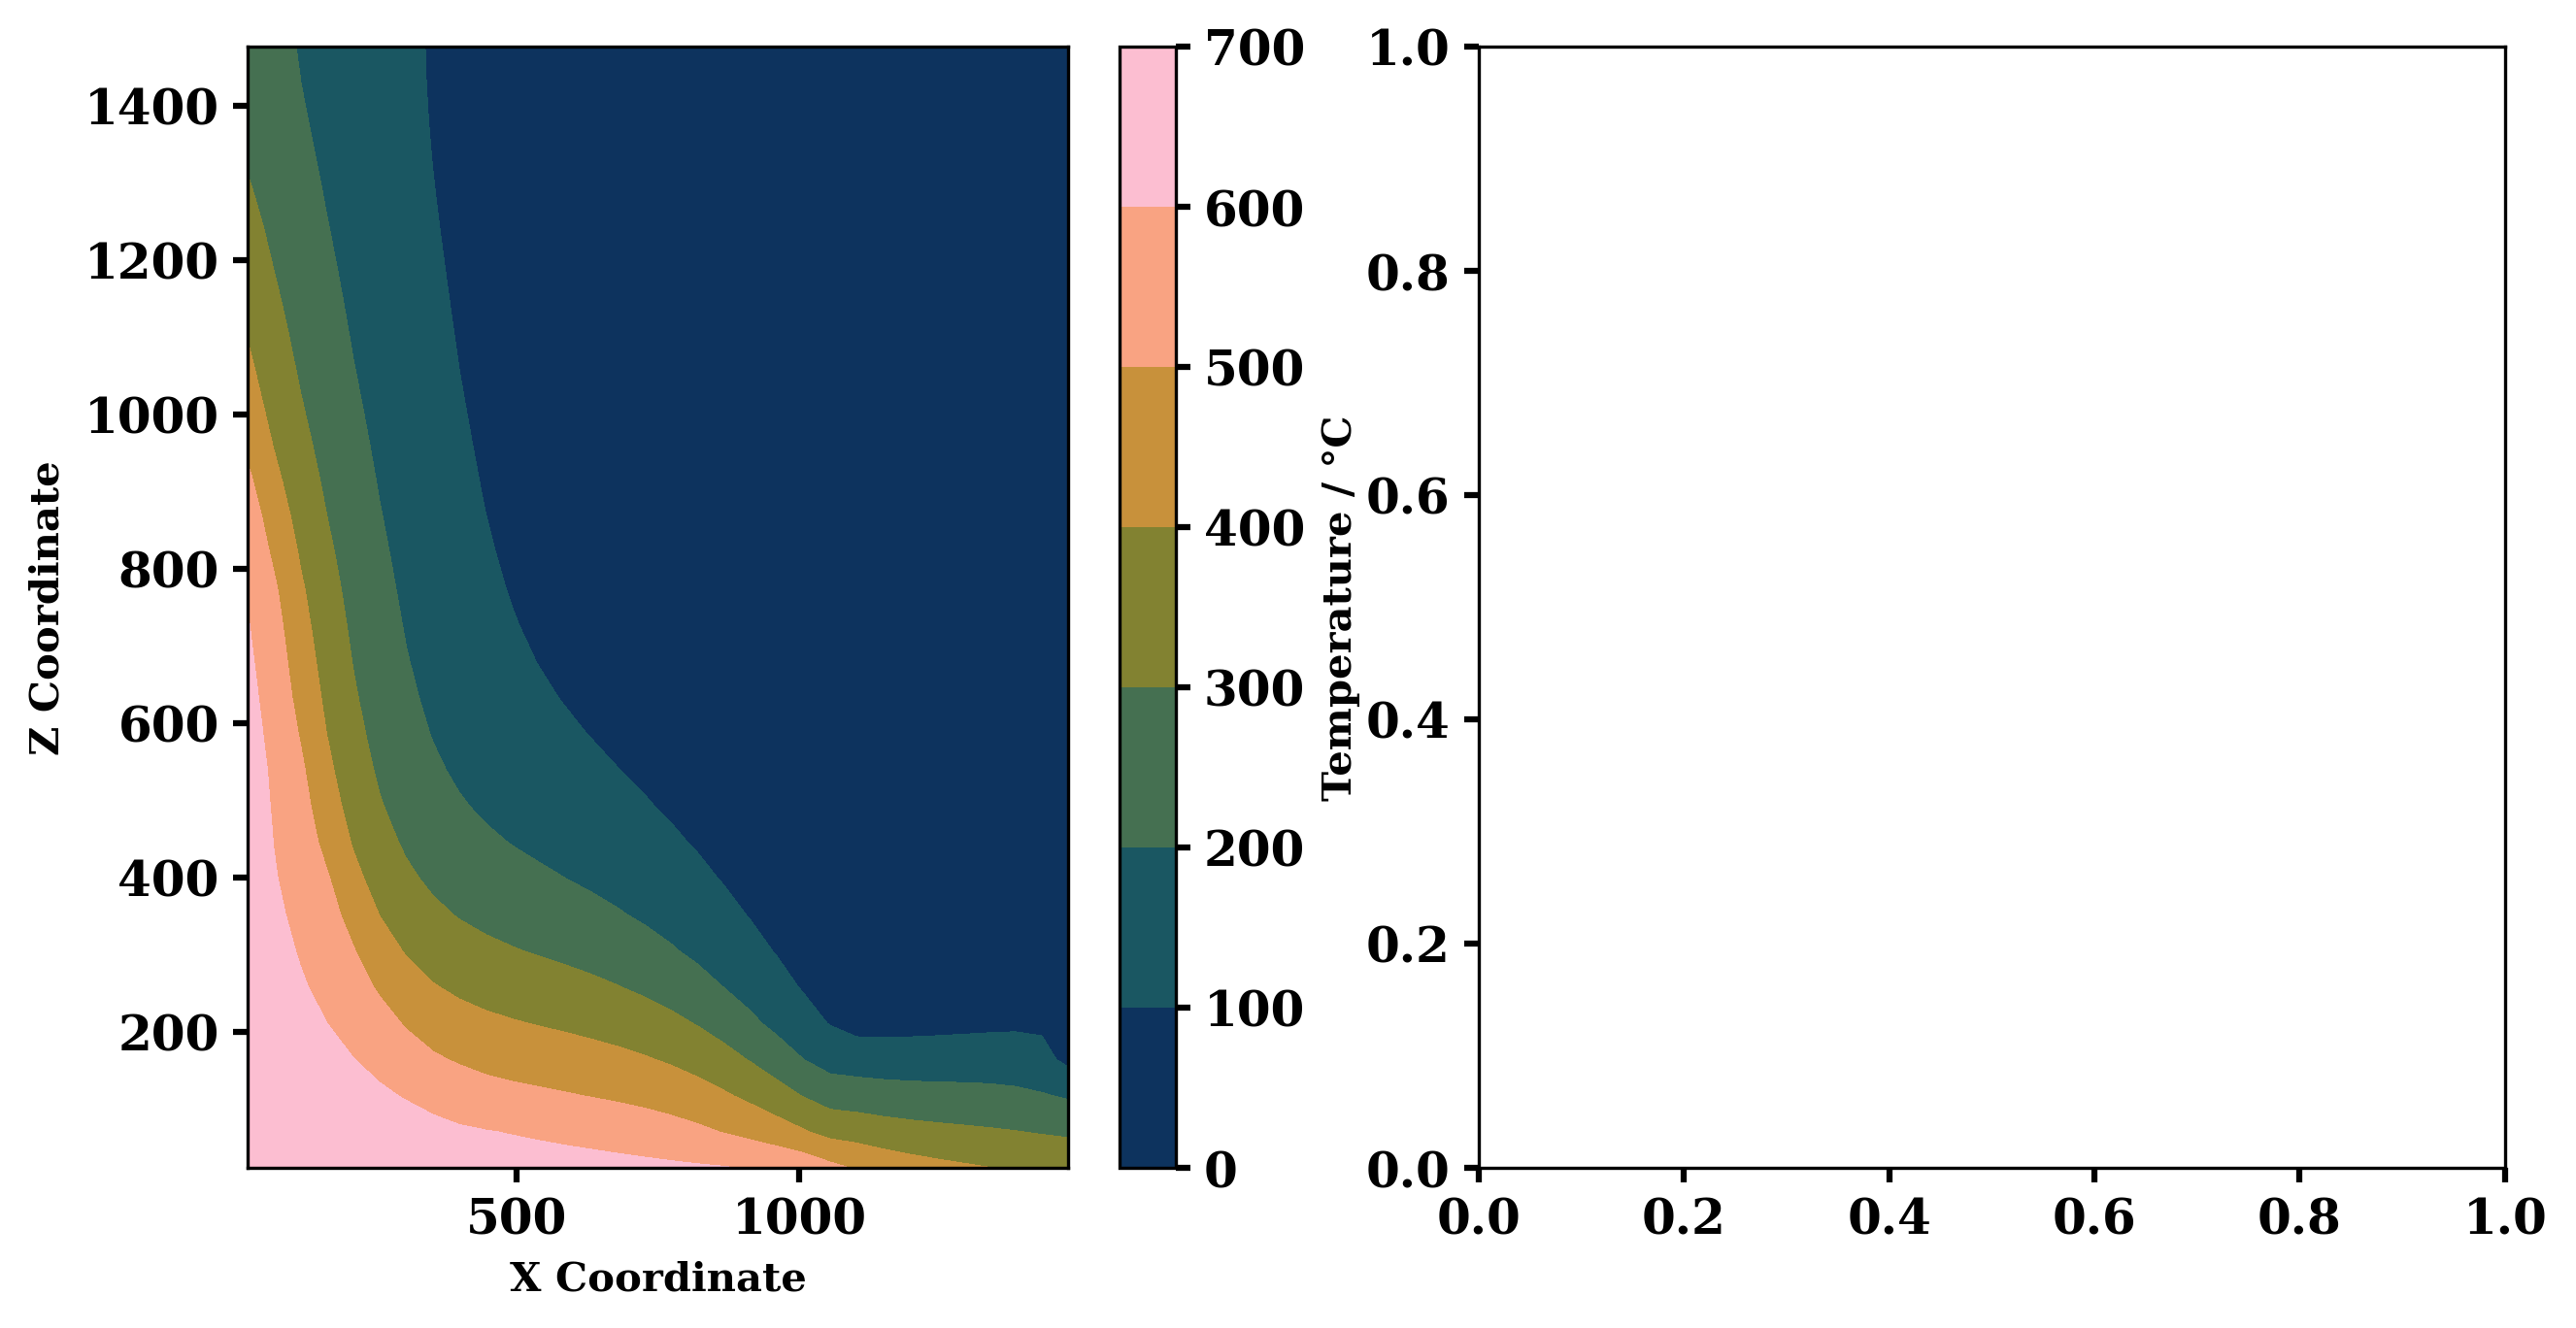

In [160]:
import matplotlib.pyplot as plt
plt.style.use('custom.mplstyle')
import xarray as xr

ds = pf_data

# Assuming 'ds' is your xarray dataset and 'temperature' is the variable of interest
# Replace 'ds' with the actual dataset name
temperature = ds.Temperature.isel(y=0, time=-1)

# Extract X and Z spatial coordinates
x = ds.coords['x']  # Replace 'X' with actual x-coordinate name if different
z = ds.coords['z']  # Replace 'Z' with actual z-coordinate name if different

# Create the contour plot
fig, ax = plt.subplots(1,2, figsize=(10, 5))
contour = ax[0].contourf(x, z, temperature, cmap=cm.batlow)

# Add color bar for temperature
fig.colorbar(contour, label='Temperature / °C')

# Label axes
ax[0].set_xlabel('X / m')
ax[0].set_ylabel('Z / m')

In [161]:
import numpy as np
import matplotlib.pyplot as plt

# Select the velocity slices at y=0 and for the nearest time step at time=1000
x_velocity_slice = ds['Liquid X-Velocity'].isel(y=0).sel(time=1000, method='nearest').values
z_velocity_slice = ds['Liquid Z-Velocity'].isel(y=0).sel(time=1000, method='nearest').values

# Extract X and Z coordinates
x = ds.coords['x'].values  # 1D X array
z = ds.coords['z'].values  # 1D Z array

x_velocity_slice = x_velocity_slice.T  # Transpose to match (Z, X)
z_velocity_slice = z_velocity_slice.T  # Transpose to match (Z, X)
permeability = np.log10(pf_data['Permeability'].isel(y=0).sel(time=1000, method='nearest').values.T)

# Create meshgrid from X and Z coordinates
X, Z = np.meshgrid(x, z)

# Create the stream plot for X and Z velocities
strm = ax[1].streamplot(X, Z, u=x_velocity_slice, v=z_velocity_slice, density=2, color='w', linewidth=0.5, arrowsize=1, arrowstyle='->')

from matplotlib.colors import BoundaryNorm
cmap = plt.get_cmap('viridis')
levels = [-15.69897, -14.69897, -13.69897, -12.69897]
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

# Use pcolormesh for sharp, blocky rendering
cmap = plt.get_cmap(cm.batlow)
norm = plt.Normalize(vmin=min(levels), vmax=max(levels))

# Plot with pcolormesh
mesh = ax[1].pcolormesh(X, Z, permeability, cmap=cmap, norm=norm)

# Label the axesaa
ax[1].set_xlabel('X / m')
ax[1].set_ylabel('Z / m')
cbar = fig.colorbar(mesh, label = 'Permeability / log10(m$^2$)')

# Adjust layout and save the figure
fig.tight_layout()
fig.savefig('output/figure_s2.png', dpi=300)